<img src="Archivos/miia.jpg" width=800x>

# Laboratorio 1

## Desarrollo de una herramienta analítica usando solo Python

Este laboratorio busca evaluar las habilidades relacionadas con la primera parte del curso, correspondiente a las primeras tres semanas. Este enunciado estará disponible desde la semana 2 y deberá entregarse al final de la semana 4 en el enlace correspondiente. Su desarrollo corresponde al 30% de la calificación total del curso.

Esta actividad responde directamente al segundo objetivo del curso:
* Implementar una herramienta analítica que permita responder una pregunta de negocio para un problema sencillo de analítica de datos, utilizando únicamente algorítmica básica en Python.

Al desarrollar este laboratorio pondrás a prueba tus habilidades para: 
1. Leer datos desde archivos.
2. Almacenar datos en  estructuras de Python.
3. Crear y llamar funciones correctamente.
4. Implementar condicionales diferenciando *if*, *elif* y *else*
5. Implementar ciclos diferenciando el propósito de *for* y *while*
6. Importar paquetes y utilizar sus funciones.

**NOTAS:**
- Te recomendamos leer por completo el enunciado del laboratorio antes de comenzar, de forma que tengas claro el propósito completo de la actividad, y puedas desarrollar tu solución apuntando a él desde el comienzo.


## Contexto: exploración del potencial para asignar becas Uniandes
La Universidad de los Andes se ha caracterizado por su compromiso con la generación de impacto en la sociedad a través de diferentes programas de becas. Programas como Quiero Estudiar, o Ser Pilo Paga, entre otros, han sido revolucionarios, al permitir que estudiantes de bajos recursos puedan acceder a una de las universidades privadas más importantes del país.

Actualmente, la Universidad quiere evaluar el potencial impacto que tendrían algunos programas de *acción afirmativa* para asignación de becas, con base en información demográfica que ha obtenido a través de encuestas. Se cuenta con información respecto a la edad, género, estado civil, estrato socio-económico, región de proveniencia, desempeño académico y nivel de escolaridad de las personas que han respondido encuestas. Los encargados de diseñar el programa saben que utilizar criterios basados en este tipo de variables es un tema sensible, pero es necesario si se quieren focalizar las oportunidades en poblaciones menos representadas.

El objetivo de este laboratorio es crear una herramienta computacional que permita a un tomador de decisiones explorar qué efecto podría tener el uso de diferentes reglas para seleccionar la población que sería beneficiaria de las becas. Puntualmente, se espera que, dadas unas reglas de selección (ej.: pertenecer a cierta región, rango de edad, etc.), la herramienta ofrezca información sobre la población potencialmente beneficiada, de forma que exista un sustento al momento de definir las reglas de selección.

## 1. Obtención e inspección de archivos

Los datos de encuestas fueron obtenidos como parte de un trabajo de campo, y por limitaciones tecnológicas, solo se cuenta con la información en archivos de texto plano. Cada archivo corresponde a una de las variables antes mencionadas y se puede garantizar que todos relacionan a las personas encuestadas en el mismo orden (i.e., la primera línea de todos los archivos corresponde a datos de la primera persona encuestada, la segunda línea a la segunda persona, etc.).

Los archivos con los que se cuenta son:
* *edades.txt*: un archivo ordenado con las edades de cada persona de la población encuestada 
* *género.txt*: un archivo ordenado con el género de cada persona de la población encuestada 
* *estado_civil.txt*: un archivo ordenado con el estado civil de cada persona de la población encuestada 
* *escolaridad.txt*: un archivo ordenado con el nivel de escolaridad de cada persona de la población encuestada 
* *estrato.txt*: un archivo ordenado con el estrato socio-económico de cada persona de la población encuestada
* *region.txt*: un archivo ordenado con la región de proveniencia de cada persona de la población encuestada

**Misión 1**

Poner en variables de Python la información que está en los archivos listados arriba.

* *Versión base*: escribe línea a línea el código necesario para poner en variables de Python la información de cada uno de los archivos.

* *Milla extra*: escribe una función que sea capaz de hacer lo anterior para un archivo y úsala en un ciclo para automatizar la lectura de los diferentes archivos.

In [1]:
import numpy as np

def leer_archivo(nombre_archivo):
    ruta_archivo = 'Archivos/' + nombre_archivo + '.txt'
    with open(ruta_archivo, "r") as archivo:
        archivo = archivo.read()
        # Separar las líneas del archivo y almacenarlas como una lista en una variable global
        archivo = archivo.splitlines()
        # Convertir cadenas numéricas en enteros
        if len([True for dato in archivo if dato.replace('.', '', 1).isdigit() is True]) == len(archivo):
            archivo = [float(dato) for dato in archivo]
        # Crear variable usando el nombre del archivo
        globals()[nombre_archivo] = archivo

        
variables = ('edad', 'genero', 'estado_civil', 'escolaridad', 'estrato', 'region', 'promedio')
for variable in variables:
    leer_archivo(variable)

**Misión 2**

Reportar las principales características en los datos.
* *Versión base*: utilizar métricas básicas como conteos o promedios por categorías en los datos.
* *Milla extra*: utilizar visualizaciones simples como diagramas de barras, de pastel u otros.

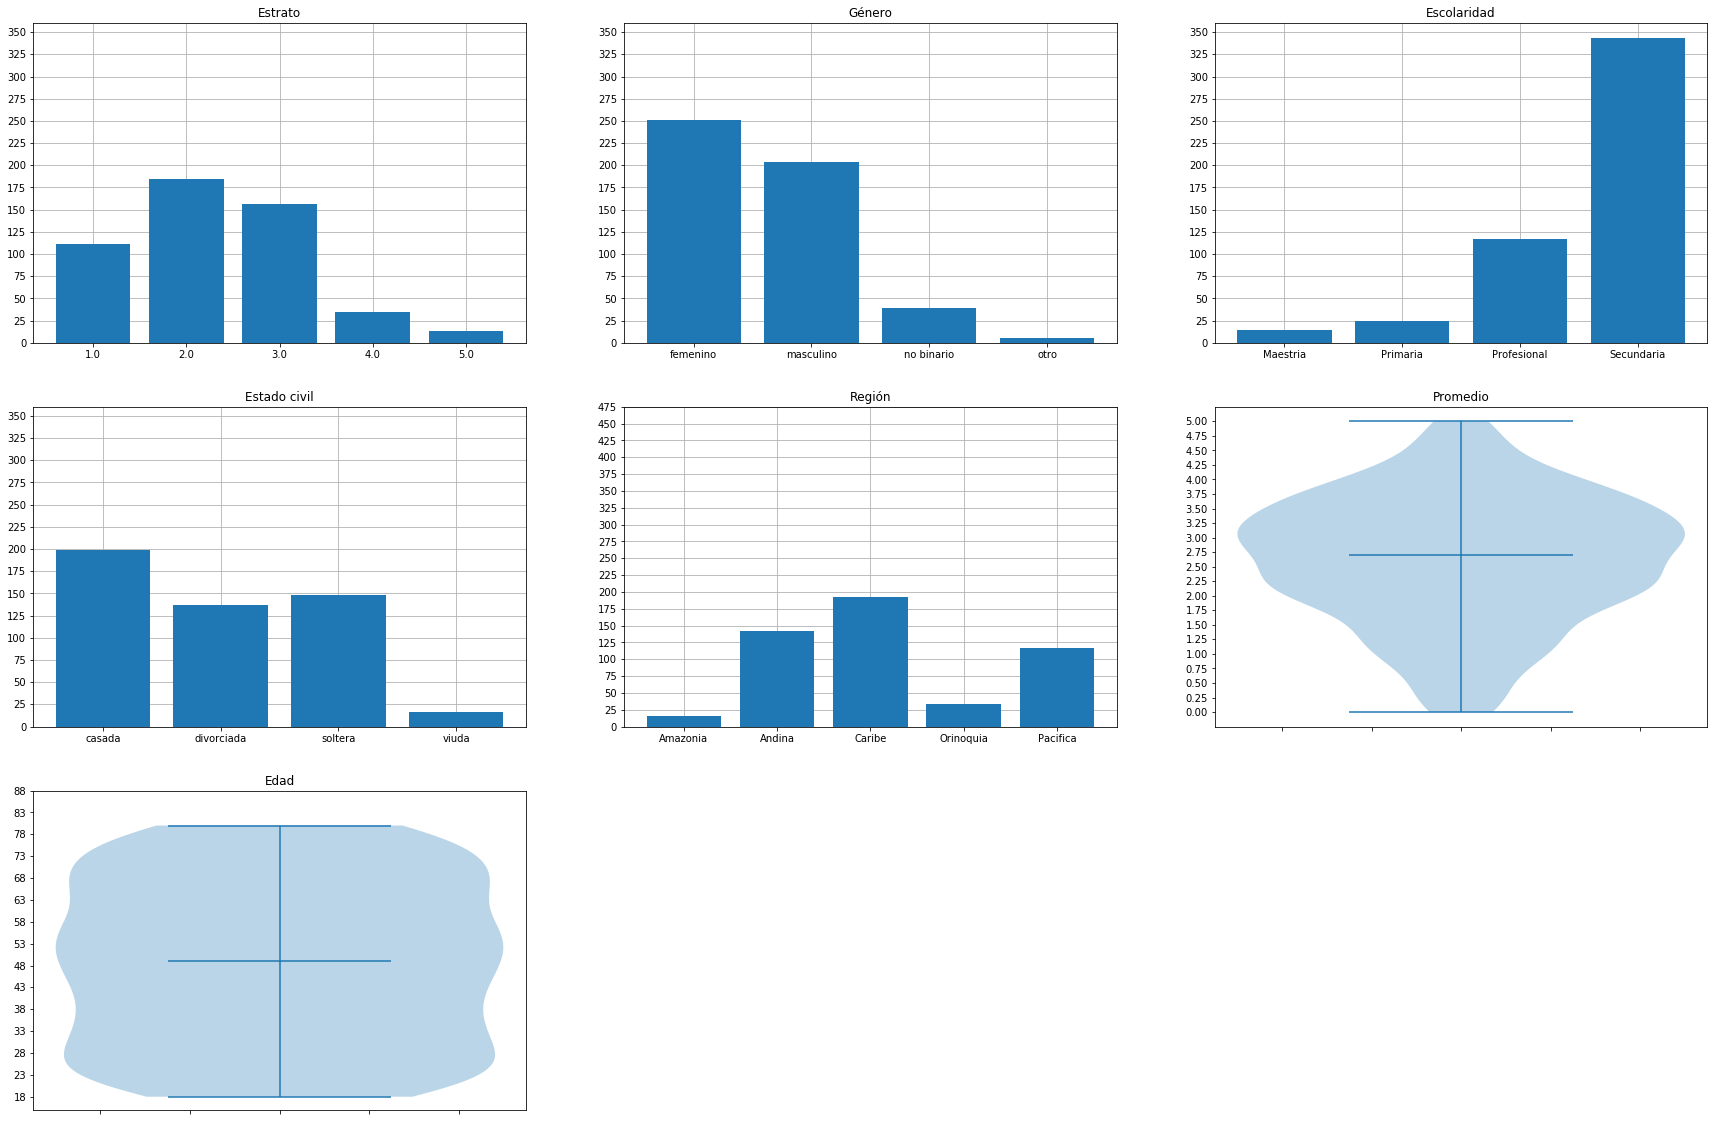

In [2]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

def visualizaciones(lista_estrato, lista_genero, lista_escolaridad,
                    lista_estado_civil, lista_region, lista_promedio,
                    lista_edad, poblaciones = 1, leg_labels = None):
    
    
    fig = plt.figure(figsize=(30, 20))
    gs = GridSpec(nrows = 3, ncols = 3)
    
    # Diagrama de barras de Estrato
    ax0 = fig.add_subplot(gs[0])
    cats = sorted(list(set(estrato)))
    if poblaciones == 1:
        ax0.bar(cats, [lista_estrato.count(c) for c in cats], zorder=3)
        ax0.set_yticks(np.arange(0, len(lista_estrato), len(lista_estrato) / 20))
        plt.xticks(np.arange(len(cats)) + 1, cats)
    elif poblaciones == 2:
        X = np.arange(len(cats))
        ax0.bar(X - 0.2, [lista_estrato[0].count(c) for c in cats], 0.4, zorder=3)
        ax0.bar(X + 0.2, [lista_estrato[1].count(c) for c in cats], 0.4, zorder=3)
        ax0.set_yticks(np.arange(0, max(len(lista_estrato[0]), len(lista_estrato[1])),
                                 max(max(len(lista_estrato[0]), len(lista_estrato[1])) // 20, 1)))
        plt.xticks(np.arange(len(cats)), cats)
        plt.legend(leg_labels)
    ax0.grid(zorder=0)
    plt.setp(ax0, title = 'Estrato')
    
    
    # Diagrama de barras de Género
    ax1 = fig.add_subplot(gs[1], sharey = ax0)
    cats = sorted(list(set(genero)))    
    if poblaciones == 1:
        ax1.bar(cats, [lista_genero.count(c) for c in cats], zorder=3)
        #ax1.set_yticks(np.arange(0, len(lista_genero), len(lista_genero) / 20))
    elif poblaciones == 2:
        X = np.arange(len(cats))
        Y = [lista_genero[0].count(c) for c in cats]
        Z = [lista_genero[1].count(c) for c in cats]
        ax1.bar(X - 0.2, Y, 0.4, zorder=3)
        ax1.bar(X + 0.2, Z, 0.4, zorder=3)
        #ax1.set_yticks(np.arange(0, max(len(lista_genero[0]), len(lista_genero[1])),
        #                         max(max(len(lista_genero[0]), len(lista_genero[1])) // 20, 1)))
    ax1.grid(zorder=0)
    plt.xticks(np.arange(len(cats)), cats)
    plt.setp(ax1, title = 'Género')

    
    # Diagrama de barras de Escolaridad
    ax2 = fig.add_subplot(gs[2], sharey = ax0)
    cats = sorted(list(set(escolaridad)))
    if poblaciones == 1:
        ax2.bar(cats, [lista_escolaridad.count(c) for c in cats], zorder=3)
        ax2.set_yticks(np.arange(0, len(lista_escolaridad), len(lista_escolaridad) / 20))
    elif poblaciones == 2:
        X = np.arange(len(cats))
        Y = [lista_escolaridad[0].count(c) for c in cats]
        Z = [lista_escolaridad[1].count(c) for c in cats]
        ax2.bar(X - 0.2, Y, 0.4, zorder=3)
        ax2.bar(X + 0.2, Z, 0.4, zorder=3)
        #ax2.set_yticks(np.arange(0, max(len(lista_escolaridad[0]), len(lista_escolaridad[1])),
        #                         max(max(len(lista_escolaridad[0]), len(lista_escolaridad[1])) // 20, 1)))
    ax2.grid(zorder=0)
    plt.xticks(np.arange(len(cats)), cats)
    plt.setp(ax2, title = 'Escolaridad')

    
    # Diagrama de barras de Estado civil
    ax3 = fig.add_subplot(gs[3], sharey = ax0)
    cats = sorted(list(set(estado_civil)))
    if poblaciones == 1:
        ax3.bar(cats, [lista_estado_civil.count(c) for c in cats], zorder=3)
        ax3.set_yticks(np.arange(0, len(lista_estado_civil), len(lista_estado_civil) / 20))
    elif poblaciones == 2:
        X = np.arange(len(cats))
        Y = [lista_estado_civil[0].count(c) for c in cats]
        Z = [lista_estado_civil[1].count(c) for c in cats]
        ax3.bar(X - 0.2, Y, 0.4, zorder=3)
        ax3.bar(X + 0.2, Z, 0.4, zorder=3)
        #ax3.set_yticks(np.arange(0, max(len(lista_estado_civil[0]), len(lista_estado_civil[1])),
        #                         max(max(len(lista_estado_civil[0]), len(lista_estado_civil[1])) // 20, 1)))
    ax3.grid(zorder=0)
    plt.xticks(np.arange(len(cats)), cats)
    plt.setp(ax3, title = 'Estado civil')

    
    # Diagrama de barras de Región
    ax4 = fig.add_subplot(gs[4] , sharey = ax0)
    cats = sorted(list(set(region)))
    if poblaciones == 1:
        ax4.bar(cats, [lista_region.count(c) for c in cats], zorder=3)
        ax4.set_yticks(np.arange(0, len(lista_region), len(lista_region) / 20))
    elif poblaciones == 2:
        X = np.arange(len(cats))
        Y = [lista_region[0].count(c) for c in cats]
        Z = [lista_region[1].count(c) for c in cats]
        ax4.bar(X - 0.2, Y, 0.4, zorder=3)
        ax4.bar(X + 0.2, Z, 0.4, zorder=3)
        #ax4.set_yticks(np.arange(0, max(len(lista_region[0]), len(lista_region[1])),
        #                         max(max(len(lista_region[0]), len(lista_region[1])) // 20, 1)))
    ax4.grid(zorder=0)
    plt.xticks(np.arange(len(cats)), cats)
    # plt.setp(ax4.get_yticklabels(), visible = False)
    plt.setp(ax4, title = 'Región')


    # Diagrama de violín de Promedio
    ax5 = fig.add_subplot(gs[5])   
    if poblaciones == 1:
        ax5.violinplot(lista_promedio, widths = 0.01, showmedians=True, bw_method = "silverman")
        ax5.set_yticks(np.arange(min(lista_promedio), max(promedio) + 0.1, 0.25))
    elif poblaciones == 2:
        violin_parts = ax5.violinplot(lista_promedio, widths = 0.8, showmedians=True, bw_method = "silverman")
        violin_parts['bodies'][0].set_facecolor("steelblue")
        violin_parts['bodies'][0].set_alpha(0.75)
        violin_parts['bodies'][1].set_facecolor("#ff7e0e")
        violin_parts['bodies'][1].set_alpha(1)
        ax5.set_yticks(np.arange(min(min(lista_promedio[0]), min(lista_promedio[1])),
                                 max(promedio) + 0.1, 0.25))
    plt.setp(ax5.get_xticklabels(), visible=False)
    plt.setp(ax5, title = 'Promedio')

    
    # Diagrama de violín de Edad
    ax6 = fig.add_subplot(gs[6])
    if poblaciones == 1:
        ax6.violinplot(lista_edad, widths = 0.01, showmedians=True, bw_method = "silverman")
        ax6.set_yticks(np.arange(min(lista_edad), max(edad) + 10, 5))
    elif poblaciones == 2:
        violin_parts = ax6.violinplot(lista_edad, widths = 0.8, showmedians=True, bw_method = "silverman")
        violin_parts['bodies'][0].set_facecolor("steelblue")
        violin_parts['bodies'][0].set_alpha(0.75)
        violin_parts['bodies'][1].set_facecolor("#ff7e0e")
        violin_parts['bodies'][1].set_alpha(1)
        ax6.set_yticks(np.arange(min(min(lista_edad[0]), min(lista_edad[1])),
                                 max(edad) + 10, 5))
    plt.setp(ax6.get_xticklabels(), visible=False)  
    plt.setp(ax6, title = 'Edad')
    
    plt.show()

visualizaciones(estrato, genero, escolaridad, estado_civil, region, promedio, edad)

## 2. Abordaje de la pregunta de negocio

El comité encargado de diseñar el programa de becas ha tenido dificultades para llegar a acuerdos. Algunos piensan que el criterio principal de selección debería ser respecto a lo económico y académico, sin importar otras características personales, mientras que otros piensan que considerar estas características es, de hecho, parte del espíritu del programa.

* El primer grupo sugiere que se deben tomar en orden ascendente los estratos y elegir, en cada uno de ellos, al 2% de personas con promedio académico superior en esa sub-población, hasta que se agoten las becas disponibles. En caso de quedar becas disponibles al final del proceso, se repite el mismo esquema, considerando que ya no se tienen en cuenta las personas que hayan sido elegidas en rondas anteriores.

* El segundo grupo sugiere que los recibidores de becas deben estar igualmente distribuidos entre las diferentes regiones y generos, considerando, por supuesto, que para cada una de esas sub-poblaciones, las personas elegidas sean las de mejores promedios académicos.

Dado que las diferencias entre estos grupos obedecen a su entendimiento particular del problema, el presidente del comité propone utilizar los datos disponibles de las encuestas, sugiriendo que se analice qué características tendría la población de elegidos bajo cada uno de los dos criterios expuestos.

**Misión 3**

Defina la pregunta de negocio y la pregunta de *analytics* para esta situación.

In [3]:
# respuesta en texto (solo leeremos los primeros 300 caracteres de la respuesta)

pregunta_negocio = ("¿Cuál debería ser el criterio de asignación del programa de becas "
                    "y cuáles son las características de los beneficiarios usando cada uno?")

pregunta_analytics = ("¿Cómo establecer algoritmos para implementar el método de selección de cada criterio y "
                      "cuáles métricas y visualizaciones podrían usarse para comparar las características "
                      "demográficas de los conjuntos de beneficiarios del programa de becas resultante?")

**Misión 4**

Desarrollar un algoritmo que permita conocer la población que sería becada según los criterios propuestos por el *primer grupo* mencionado arriba.

In [4]:
becas_disponibles = 25

def imprimir_seleccionados(lista_id_seleccionados):
    cols = ["id"]
    cols.extend(variables)
    print(cols)
    for persona in lista_id_seleccionados:
        print([datos[col][persona] for col in cols])
            
def ordenar_por_promedio(lista):
        df = list(zip(lista, [datos["promedio"][persona] for persona in lista]))
        df.sort(reverse = True, key = lambda x : x[1])
        df = [persona[0] for persona in df]
        return df
            
def preparacion_datos():
    datos = {var: globals()[var] for var in variables}
    n = len(edad)
    datos["id"] = [i for i in range(n)]
    datos["elegido"] = [False for i in range(n)]
    return datos

datos = preparacion_datos()

estratos = list(set(estrato))
estratos.sort()
estratos = tuple(estratos)

while becas_disponibles > 0:   
    for e in estratos:
        df = [persona for persona in datos["id"] if (datos["estrato"][persona] == e
                                                     and datos["elegido"][persona] is False)]      
        promedios_por_estrato = [datos["promedio"][persona] for persona in df]
        cuantil_98 = np.quantile(np.array(promedios_por_estrato), 0.98)
        df = [persona for persona in df if datos["promedio"][persona] >= cuantil_98]        
        df = ordenar_por_promedio(df)
        
        if becas_disponibles < len(df):
            df = df[: becas_disponibles]
        for persona in df:
            datos["elegido"][persona] = True

        becas_disponibles -= len(df)      
        if becas_disponibles == 0:
            break

seleccionados_mis_4 = [persona for persona in datos["id"] if datos["elegido"][persona] is True]
imprimir_seleccionados(seleccionados_mis_4)

['id', 'edad', 'genero', 'estado_civil', 'escolaridad', 'estrato', 'region', 'promedio']
[7, 54.0, 'femenino', 'casada', 'Secundaria', 2.0, 'Andina', 4.9]
[9, 80.0, 'masculino', 'soltera', 'Profesional', 3.0, 'Andina', 4.5]
[49, 20.0, 'masculino', 'soltera', 'Secundaria', 3.0, 'Amazonia', 4.5]
[60, 75.0, 'femenino', 'casada', 'Primaria', 3.0, 'Caribe', 4.9]
[109, 60.0, 'femenino', 'soltera', 'Profesional', 3.0, 'Pacifica', 4.7]
[134, 22.0, 'femenino', 'soltera', 'Secundaria', 3.0, 'Andina', 4.2]
[137, 70.0, 'femenino', 'divorciada', 'Profesional', 2.0, 'Andina', 4.8]
[159, 55.0, 'masculino', 'soltera', 'Profesional', 3.0, 'Caribe', 4.6]
[161, 26.0, 'masculino', 'casada', 'Secundaria', 3.0, 'Pacifica', 4.4]
[162, 47.0, 'masculino', 'casada', 'Secundaria', 1.0, 'Andina', 4.9]
[207, 21.0, 'femenino', 'casada', 'Profesional', 2.0, 'Andina', 4.9]
[243, 59.0, 'femenino', 'divorciada', 'Secundaria', 2.0, 'Caribe', 5.0]
[259, 60.0, 'no binario', 'soltera', 'Secundaria', 5.0, 'Andina', 4.8]
[28

**Misión 5**

Desarrollar un algoritmo que permita conocer la población que sería becada según los criterios propuestos por el *segundo grupo* mencionado arriba.

In [5]:
becas_disponibles = 25
datos = preparacion_datos()
generos, regiones = set(genero), set(region)

# Formación de grupos
grupos = {}
for gen in generos:
    for reg in region:
        grupos[reg, gen] = [persona for persona in datos["id"] if (datos["genero"][persona] == gen
                                                                   and datos["region"][persona] == reg)]
        grupos[reg, gen] = (grupos[reg, gen], len(grupos[reg, gen]))
        
# ELiminación de grupos vacíos
for g, g_data in list(grupos.items()):
    if g_data[1] == 0:
        del grupos[g]

n_grupos = len(grupos.keys())

# Becas a repartir entre grupos no vacíos
becas_sobrantes = int(becas_disponibles % n_grupos)
if becas_sobrantes != 0:
    becas_por_grupo = int((becas_disponibles - becas_sobrantes) / n_grupos)
else:
    becas_por_grupo = int(becas_disponibles / n_grupos)

# Repartición de becas
for g in grupos.values():
    df = ordenar_por_promedio(g[0])
    for persona in df[: becas_por_grupo]:
        datos["elegido"][persona] = True    

# Impresión de resultados
if becas_sobrantes != 0:
    print(("No es posible distribuir todas las becas uniformemente: "
           + "{0} beca{1} sobrante{1}.").format(becas_sobrantes, "" if becas_sobrantes == 1 else "s"))

seleccionados_mis_5 = [persona for persona in datos["id"] if datos["elegido"][persona] is True]
imprimir_seleccionados(seleccionados_mis_5)

No es posible distribuir todas las becas uniformemente: 7 becas sobrantes.
['id', 'edad', 'genero', 'estado_civil', 'escolaridad', 'estrato', 'region', 'promedio']
[4, 26.0, 'otro', 'divorciada', 'Secundaria', 2.0, 'Orinoquia', 2.1]
[7, 54.0, 'femenino', 'casada', 'Secundaria', 2.0, 'Andina', 4.9]
[22, 51.0, 'no binario', 'casada', 'Secundaria', 2.0, 'Caribe', 4.3]
[49, 20.0, 'masculino', 'soltera', 'Secundaria', 3.0, 'Amazonia', 4.5]
[113, 57.0, 'femenino', 'divorciada', 'Profesional', 2.0, 'Orinoquia', 3.9]
[136, 60.0, 'otro', 'soltera', 'Secundaria', 2.0, 'Caribe', 3.6]
[162, 47.0, 'masculino', 'casada', 'Secundaria', 1.0, 'Andina', 4.9]
[195, 75.0, 'otro', 'casada', 'Secundaria', 4.0, 'Amazonia', 3.1]
[243, 59.0, 'femenino', 'divorciada', 'Secundaria', 2.0, 'Caribe', 5.0]
[259, 60.0, 'no binario', 'soltera', 'Secundaria', 5.0, 'Andina', 4.8]
[361, 73.0, 'no binario', 'divorciada', 'Profesional', 1.0, 'Pacifica', 4.0]
[363, 32.0, 'femenino', 'casada', 'Secundaria', 1.0, 'Pacifica', 

**Misión 6**

Desarrollar un algoritmo, a partir de lo anterior, cuyo resultado permita al comité comparar fácilmente las características de las dos poblaciones hipotéticas que recibirían becas.

*Ayuda*: considera utilizar tus implementaciones de la *Misión 2* para facilitar esta misión.

d:\programas\python 3.8\lib\site-packages\matplotlib\cbook\__init__.py:1426: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


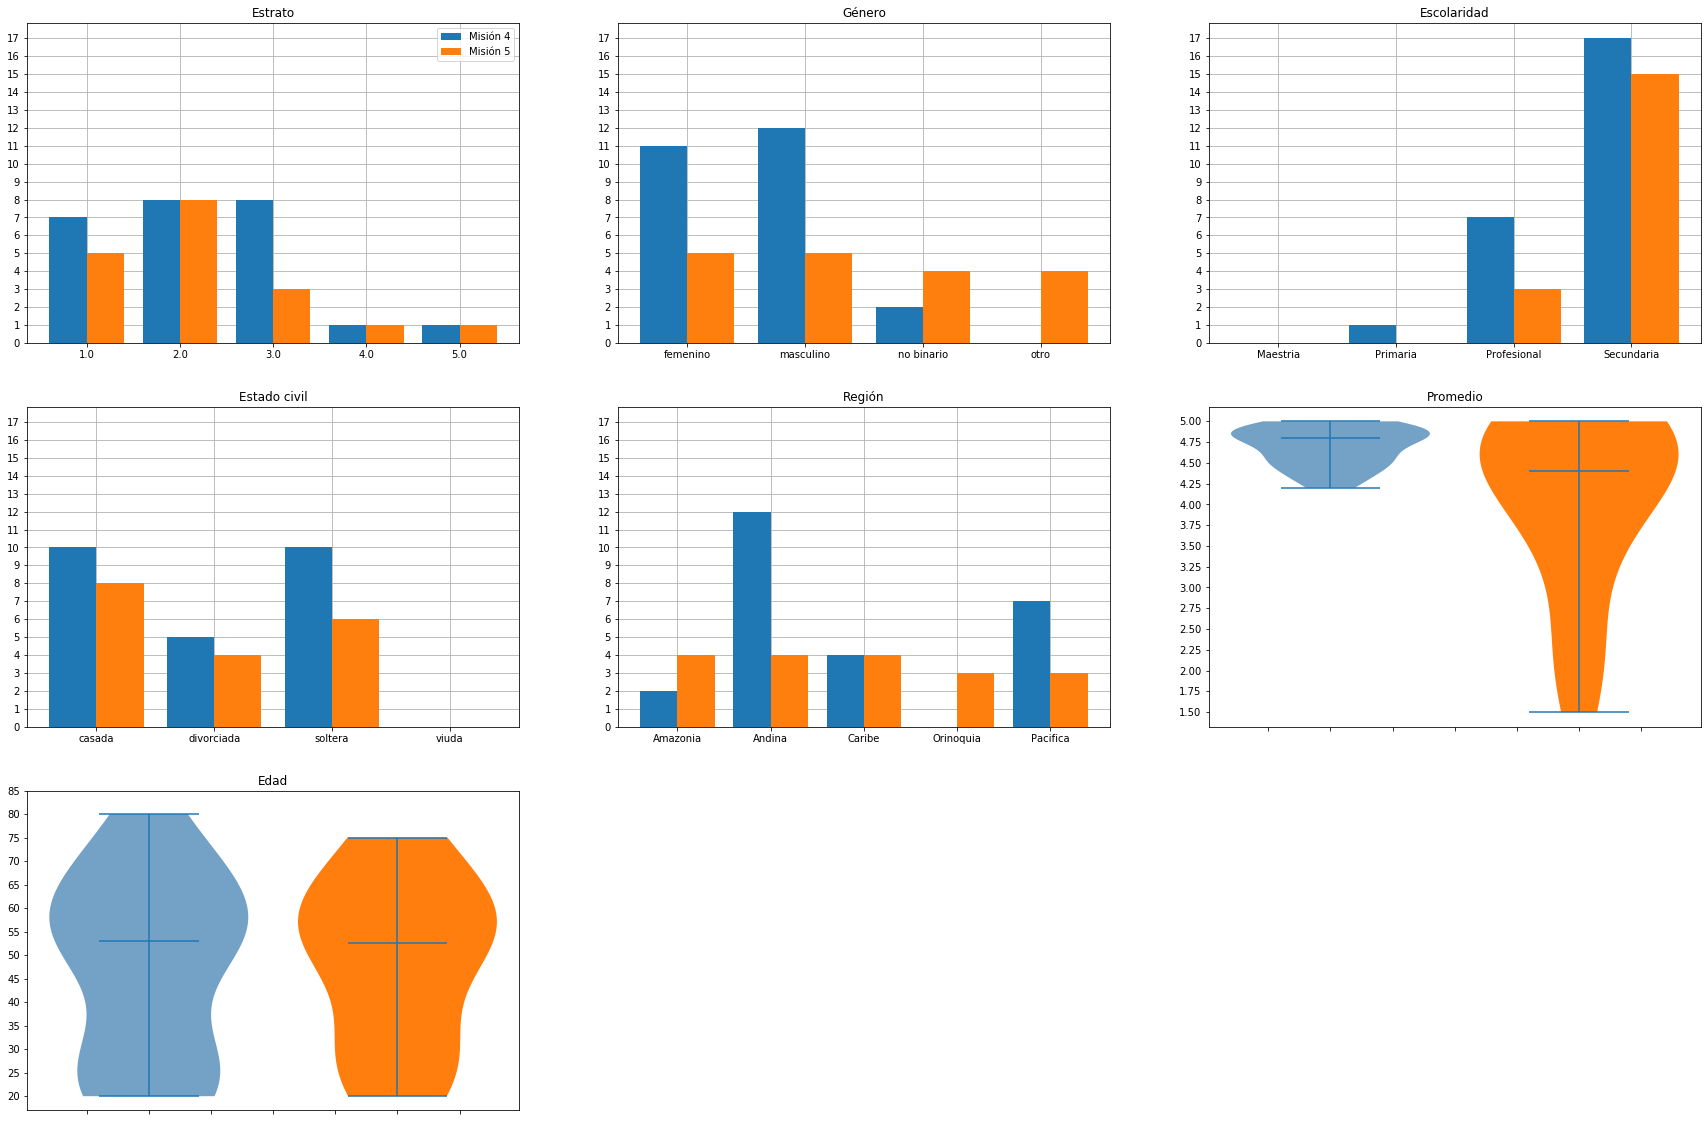

In [6]:
seleccionados = [persona for persona in datos["id"] if datos["elegido"][persona] is True]

visualizaciones(lista_estrato = [[datos["estrato"][persona] for persona in seleccionados_mis_4],
                                 [datos["estrato"][persona] for persona in seleccionados_mis_5]],
                lista_genero = [[datos["genero"][persona] for persona in seleccionados_mis_4],
                                [datos["genero"][persona] for persona in seleccionados_mis_5]],
                lista_escolaridad = [[datos["escolaridad"][persona] for persona in seleccionados_mis_4],
                                     [datos["escolaridad"][persona] for persona in seleccionados_mis_5]],
                lista_estado_civil = [[datos["estado_civil"][persona] for persona in seleccionados_mis_4],
                                      [datos["estado_civil"][persona] for persona in seleccionados_mis_5]],
                lista_region = [[datos["region"][persona] for persona in seleccionados_mis_4],
                                [datos["region"][persona] for persona in seleccionados_mis_5]],
                lista_promedio = [[datos["promedio"][persona] for persona in seleccionados_mis_4],
                                 [datos["promedio"][persona] for persona in seleccionados_mis_5]],
                lista_edad = [[datos["edad"][persona] for persona in seleccionados_mis_4],
                              [datos["edad"][persona] for persona in seleccionados_mis_5]],
                poblaciones = 2, leg_labels = ("Misión 4", "Misión 5"))

## 3. Desarrollo de una solución analítica

Reconociendo la complejidad de este problema (que no permite reducirlo a una dicotomía) y viendo el potencial del análisis de datos para enriquecer la discusión y los insumos para tomar decisiones, el comité ha solicitado una herramienta analítica que les permita . Sus requerimientos son:

* La herramienta debe permitir ingresar una política de selección de becados.
    * Se debe poder elegir el rango de edad de los aspirantes.
    * Se debe poder elegir qué proporción de las becas se asigna a cada género, a cada estrato, o a cada región (pero sólo debe elegirse uno de estos criterios).
* La herramienta debe generar un resultado que permita al comité analizar las características de la población potencialmente elegida si se usara la política ingresada.

**Misión 7**

Desarrollar, a partir de lo construido hasta el momento, un algoritmo que permita cumplir con los requerimientos del comité.

In [ ]:
import math

becas_disponibles = 25

def alg_mis_7(becas, min_edad, max_edad, criterio):

    if criterio not in ("genero", "estrato", "region"):
        print("Introduzca un criterio válido: genero, estrato o region.")
    else:
        datos = preparacion_datos()

        # Asignación de proporciones de becas según criterio elegido
        asignacion = {grupo: None for grupo in sorted(list(set(datos[criterio])))}

        while True:
            print("--Introduzca las proporciones de becas a asignar para cada grupo: {}".format(
                ', '.join([str(item) for item in list(asignacion.keys())])))    
            for grupo in asignacion.keys():
                asignacion[grupo] = float(input("Proporción de becas para {0} {1}: ".format(criterio, grupo)))
            if round(sum(asignacion.values()), 3) == 1.0:
                break
            else:
                print("Revise bien, las proporciones de beca deben sumar 1.\n")

        # Cálculo de becas a repartir por grupo
        for grupo in asignacion:
            asignacion[grupo] = math.floor(becas_disponibles * asignacion[grupo])

        # Repartición de becas for grupo
        becas_asignadas = 0
        for grupo in asignacion.keys():
            df = [persona for persona in datos["id"] if (datos[criterio][persona] == grupo
                                                         and (min_edad <= datos["edad"][persona] <= max_edad))]
            df = ordenar_por_promedio(df)
            becas_asignadas +=  len(df[: asignacion[grupo]])
            for persona in df[: asignacion[grupo]]:
                datos["elegido"][persona] = True 

        becas_sobrantes = becas_disponibles - becas_asignadas

        # Impresión de resultados
        print("\n--Beneficiarios seleccionados:")
        if becas_sobrantes != 0:
            print(("No es posible distribuir todas las becas según el criterio seleccionado: "
                   + "{0} beca{1} sobrante{1}.").format(becas_sobrantes, "" if becas_sobrantes == 1 else "s"))

        seleccionados_mis_7 = [persona for persona in datos["id"] if datos["elegido"][persona] is True]

        visualizaciones(lista_estrato = [datos["estrato"][persona] for persona in seleccionados_mis_7],
                        lista_genero = [datos["genero"][persona] for persona in seleccionados_mis_7],
                        lista_escolaridad = [datos["escolaridad"][persona] for persona in seleccionados_mis_7],
                        lista_estado_civil = [datos["estado_civil"][persona] for persona in seleccionados_mis_7],
                        lista_region = [datos["region"][persona] for persona in seleccionados_mis_7],
                        lista_promedio = [datos["promedio"][persona] for persona in seleccionados_mis_7],
                        lista_edad = [datos["edad"][persona] for persona in seleccionados_mis_7])

        imprimir_seleccionados(seleccionados_mis_7)

        
alg_mis_7(becas_disponibles, min_edad = 25,
          max_edad = 70, criterio = "estrato")

--Introduzca las proporciones de becas a asignar para cada grupo: 1.0, 2.0, 3.0, 4.0, 5.0


**Misión 8**

Proponer, con base en tu propio uso de la herramienta, una política de ingreso que consideres apropiada dado el contexto proporcionado. Si lo crees adecuado, explica, máximo 500 caracteres, las virtudes de tu propuesta (esto puede estar soportado en los datos, o no).

In [ ]:
respuesta = ("Dado que en Colombia la menor esperanza de vida entre géneros es de 74.96 años y suponiendo que la beca "
             "aplica para programas de pregrado, se deberían escoger personas con máximo 55 años para intentar procurar "
             "la supervivencia durante el periodo de estudio y al menos 15 años de aprovechamiento del conocimiento adquirido. "
            "Por otra parte, se priorizará la corrección de desigualdades económicas, asignando una proporción de 35% de becas "
            "para estratos 1 y 2, 20% para estrato 3 y 10% para estrato 4.")

**Misión 9**

Ejecutar el algoritmo desarrollado en la *Misión 7* sobre la política que sugieres proponer al comité. Explicar claramente tus conlusiones con el soporte de los resultados de la herramienta.

In [ ]:
# Valores a introducir manualmente: 0.35, 0.35, 0.2, 0.1, 0
alg_mis_7(becas = 25, min_edad = 15,
          max_edad = 55, criterio = "estrato")

conclusion = ("Se observa una participación en la que predominan los géneros masculino y femenino, con poca participación "
              "de binario y otros. La formación de los participantes es mayoritariamente de tipo secundaria, con sólo unos "
              "cuantos profesionales y 1 individuo de formación básica primaria. En el estado civil de los elegidos abundan"
             "personas casadas y solteras, provenientes en su mayoría de la región Andina y Pacífica. Se logra participación ",
             "de todas las regiones. Más de la mitad de los elegidos tiene un promedio de 4.5 o superior, si bien hay 2 ",
             "individuos con promedios individuales de 2.9 y 3.1, respectivamente. En la distribución de la edad, se observa ",
             "una bimodalidad alrededor de los 50 años y 25 años y se nota que las personas de 35 a 43 años tienen una menor ",
             "participación el programa")


## Referencias
* Discriminación Positiva<br> 
https://es.wikipedia.org/wiki/Discriminaci%C3%B3n_positiva
* Análisis de formulación del programa “Ser Pilo Paga”<br>
https://repository.urosario.edu.co/handle/10336/12526
* La acción afirmativa en la Universidad de los Andes: El caso del programa "Oportunidades para talentos nacionales"<br> http://www.scielo.org.co/scielo.php?script=sci_arttext&pid=S0123-885X2004000300005
* Acción afirmativa y equidad: un análisis desde la propuesta de Thomas Nagel<br>
http://www.scielo.org.mx/scielo.php?script=sci_arttext&pid=S2007-24062016000200049

## Créditos

Camilo Gómez - 11/06/21<br>
*Revisado*: 25/08/21